In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = (13,8)
%config InlineBackend.figure_format = 'retina'

# APEX Gun

In [3]:
from astra import Astra
from astra import recommended_spacecharge_mesh
from distgen import Generator

import matplotlib.pyplot as plt
import os

In [4]:
# Input template file 
ASTRA_IN = '../templates/apex_gun/astra.in'
DISTGEN_IN = '../templates/apex_gun/distgen.yaml'

In [5]:
recommended_spacecharge_mesh(10000)

{'nrad': 20, 'nlong_in': 43}

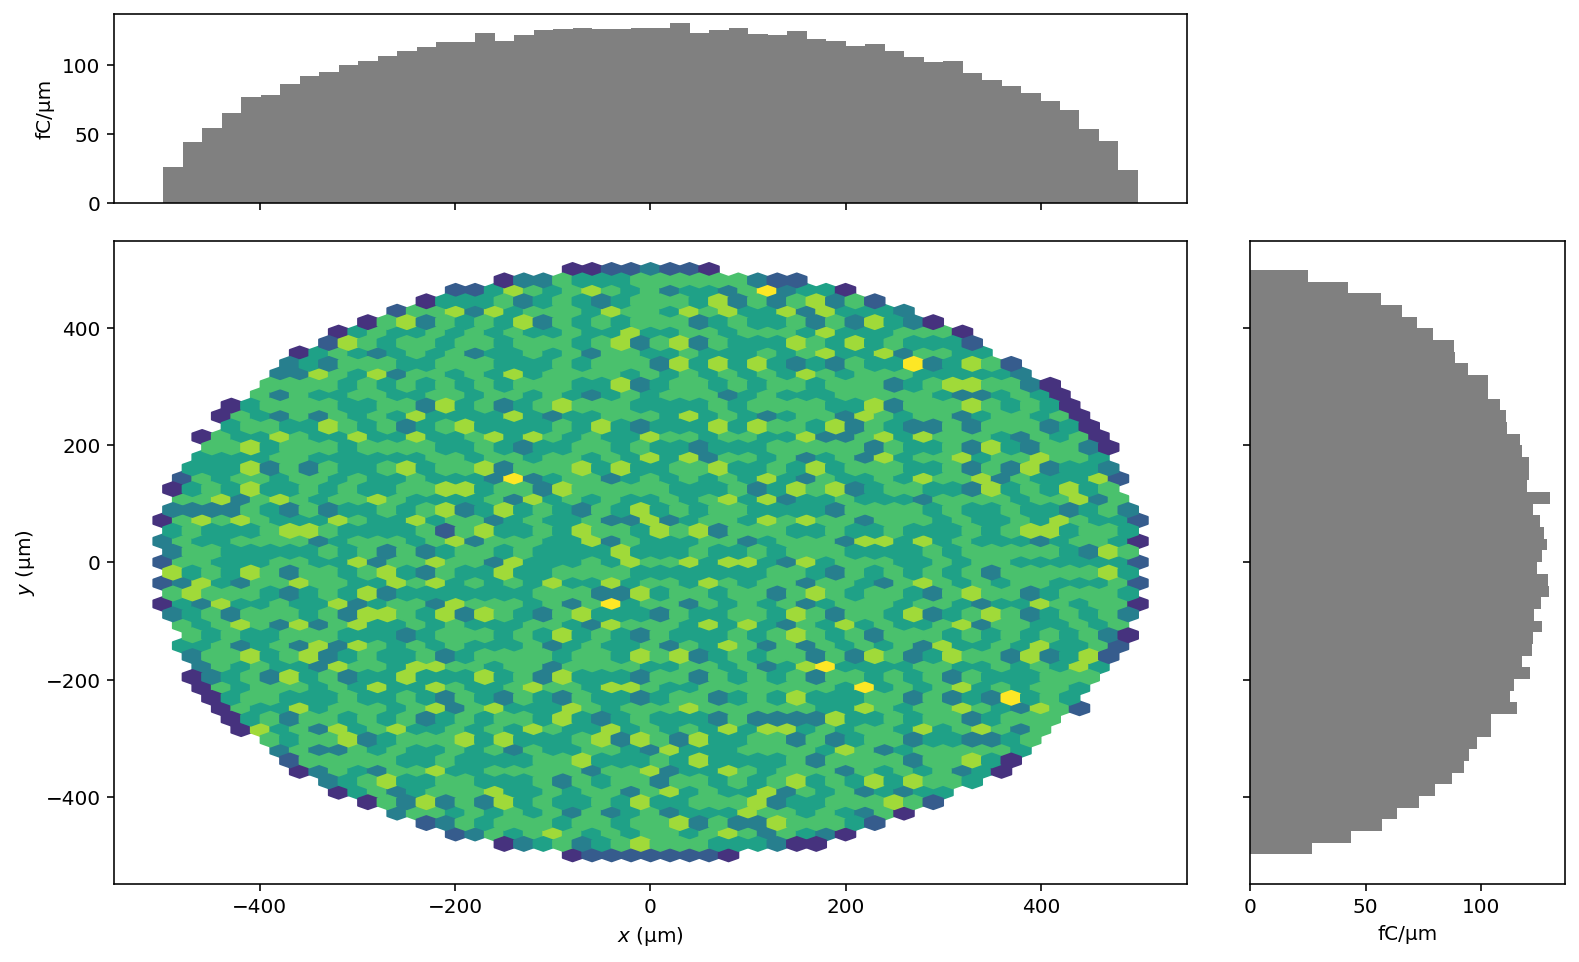

In [6]:
G = Generator(DISTGEN_IN)
G['n_particle'] = 10000

G.run()
P0 = G.particles
#factor = 2
#P0.x *= factor  
#P0.y *= 1/factor 
P0.plot('x', 'y')

In [7]:
# Make an Astra object
A = Astra(input_file=ASTRA_IN, initial_particles=P0, verbose=True)
sc_settings = recommended_spacecharge_mesh(P0['n_particle'])
A.input['charge'].update()

A.input['output']['zstop'] = 0.15

A.input['charge']['lspch'] = True

A.input['charge']['lspch3d'] = False

In [8]:
%%time
# Run
A.run()

Initial particles written to /var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmpww8jnh86/astra.particles
/var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmpww8jnh86/astra.particles exists, will not symlink
Linked /Users/chrisonian/Code/GitHub/lume-astra/examples/templates/apex_gun/187MHz_HighDef_March2010.dat to /var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmpww8jnh86/187MHz_HighDef_March2010.dat
Linked /Users/chrisonian/Code/GitHub/lume-astra/examples/templates/apex_gun/realbucking.dat to /var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmpww8jnh86/realbucking.dat
Linked /Users/chrisonian/Code/GitHub/lume-astra/examples/templates/apex_gun/newSOL.dat to /var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmpww8jnh86/newSOL.dat
 --------------------------------------------------------------------------

               Astra- A space charge tracking algorithm 
                 Version 3.2 - macOS 64bit - Intel   
                        DESY,  Hamburg 2011          
                  

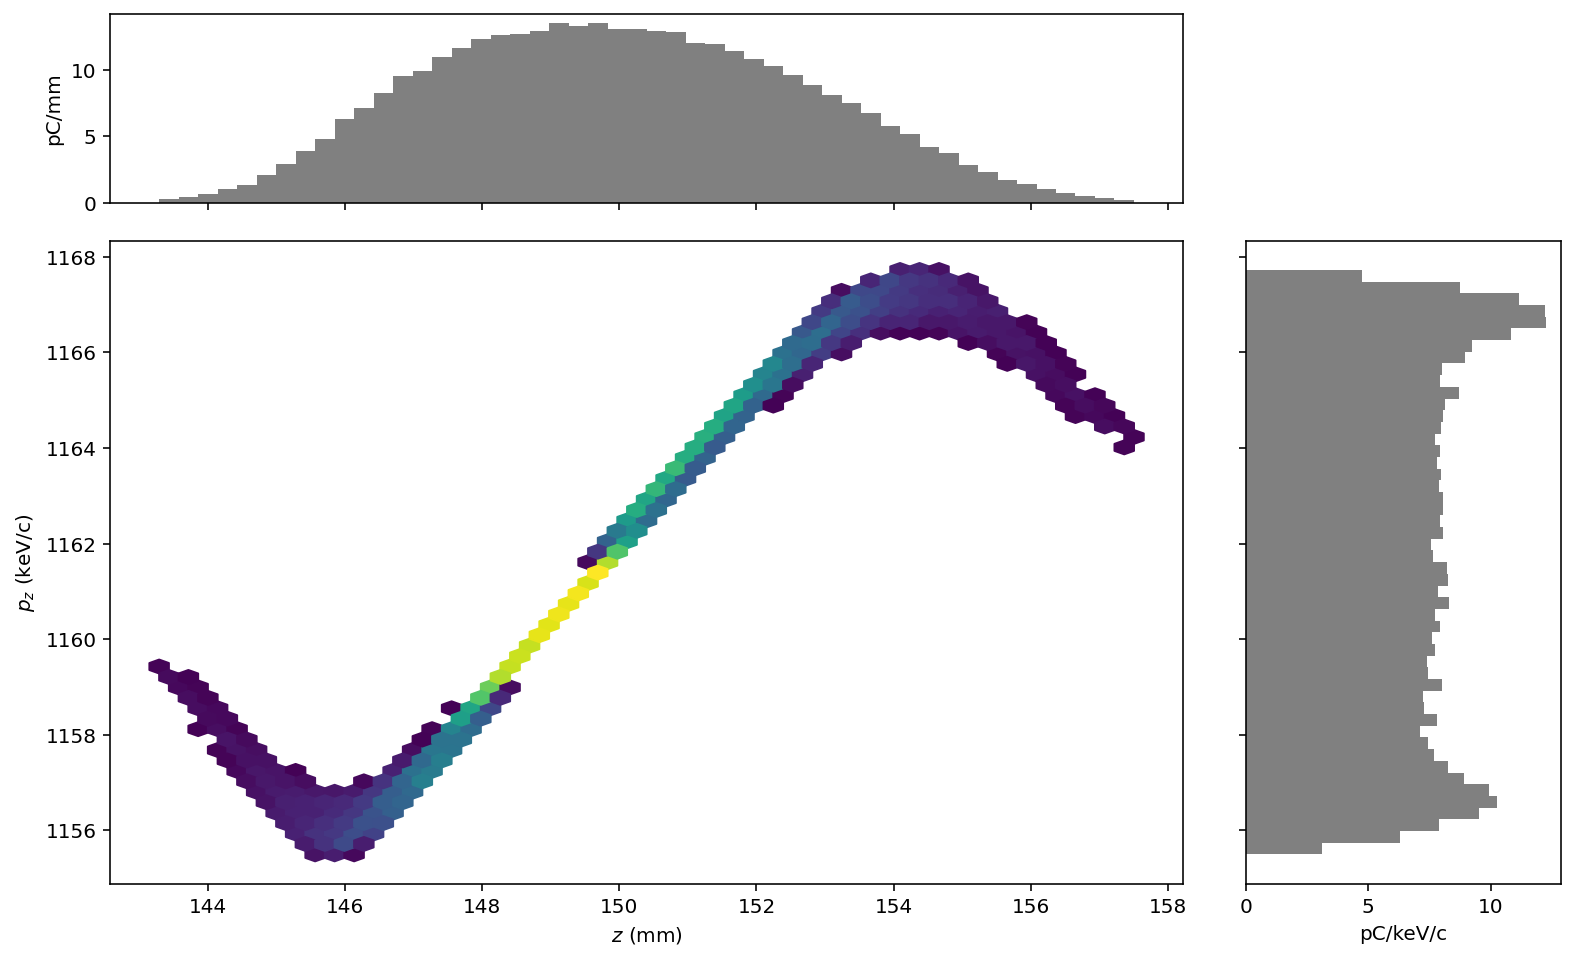

In [9]:
P1 = A.particles[-1]
P1.plot('z', 'pz')

# 3D Space Charge method

This does not properly take the image charge force at the cathode.


In [11]:
A2 = A.copy()
A2.input['charge']['lspch'] = True
A2.input['charge']['lspch3d'] = True
A2.input['charge']['l2d_3d'] = False
A2.input['charge']['nxf'] = 32
A2.input['charge']['nyf'] = 32
A2.input['charge']['nzf'] = 32
A2.input['charge']['nx0'] = 4
A2.input['charge']['ny0'] = 4
A2.input['charge']['nz0'] = 4
A2.configure()
A2.run()

Initial particles written to /var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmp0cdggovd/astra.particles
/var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmp0cdggovd/astra.particles exists, will not symlink
Linked /Users/chrisonian/Code/GitHub/lume-astra/examples/templates/apex_gun/187MHz_HighDef_March2010.dat to /var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmp0cdggovd/187MHz_HighDef_March2010.dat
Linked /Users/chrisonian/Code/GitHub/lume-astra/examples/templates/apex_gun/realbucking.dat to /var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmp0cdggovd/realbucking.dat
Linked /Users/chrisonian/Code/GitHub/lume-astra/examples/templates/apex_gun/newSOL.dat to /var/folders/wj/lfgr01993dx79p9cm_skykbw0000gn/T/tmp0cdggovd/newSOL.dat
 --------------------------------------------------------------------------

               Astra- A space charge tracking algorithm 
                 Version 3.2 - macOS 64bit - Intel   
                        DESY,  Hamburg 2011          
                  

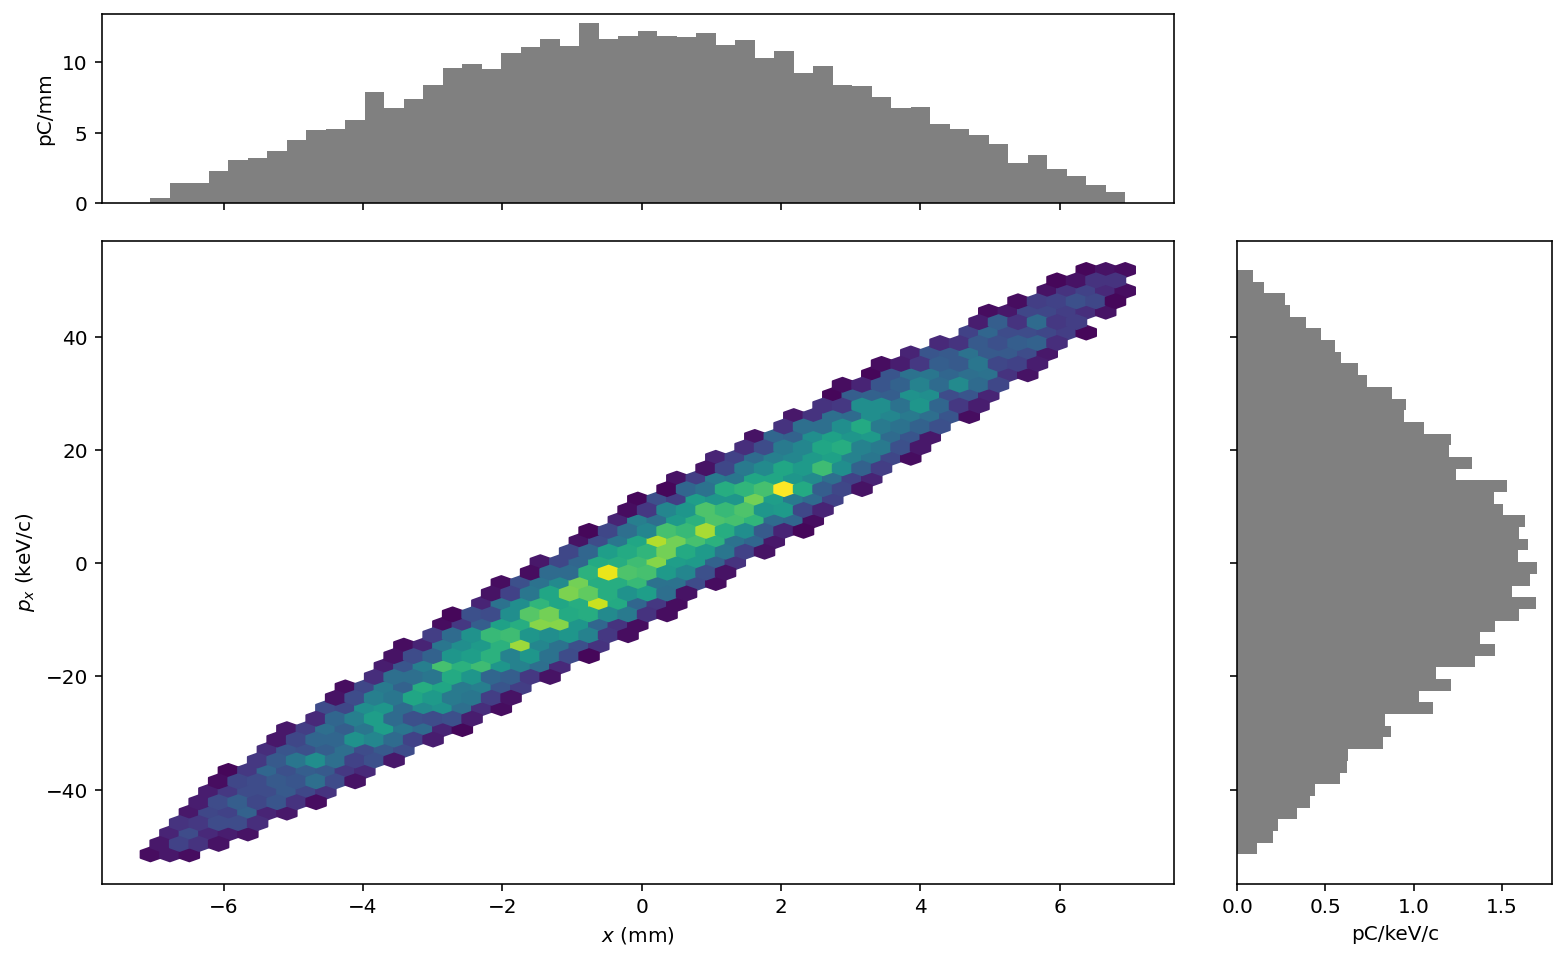

In [12]:
P2 = A2.particles[-1]
P2.plot('x', 'px')

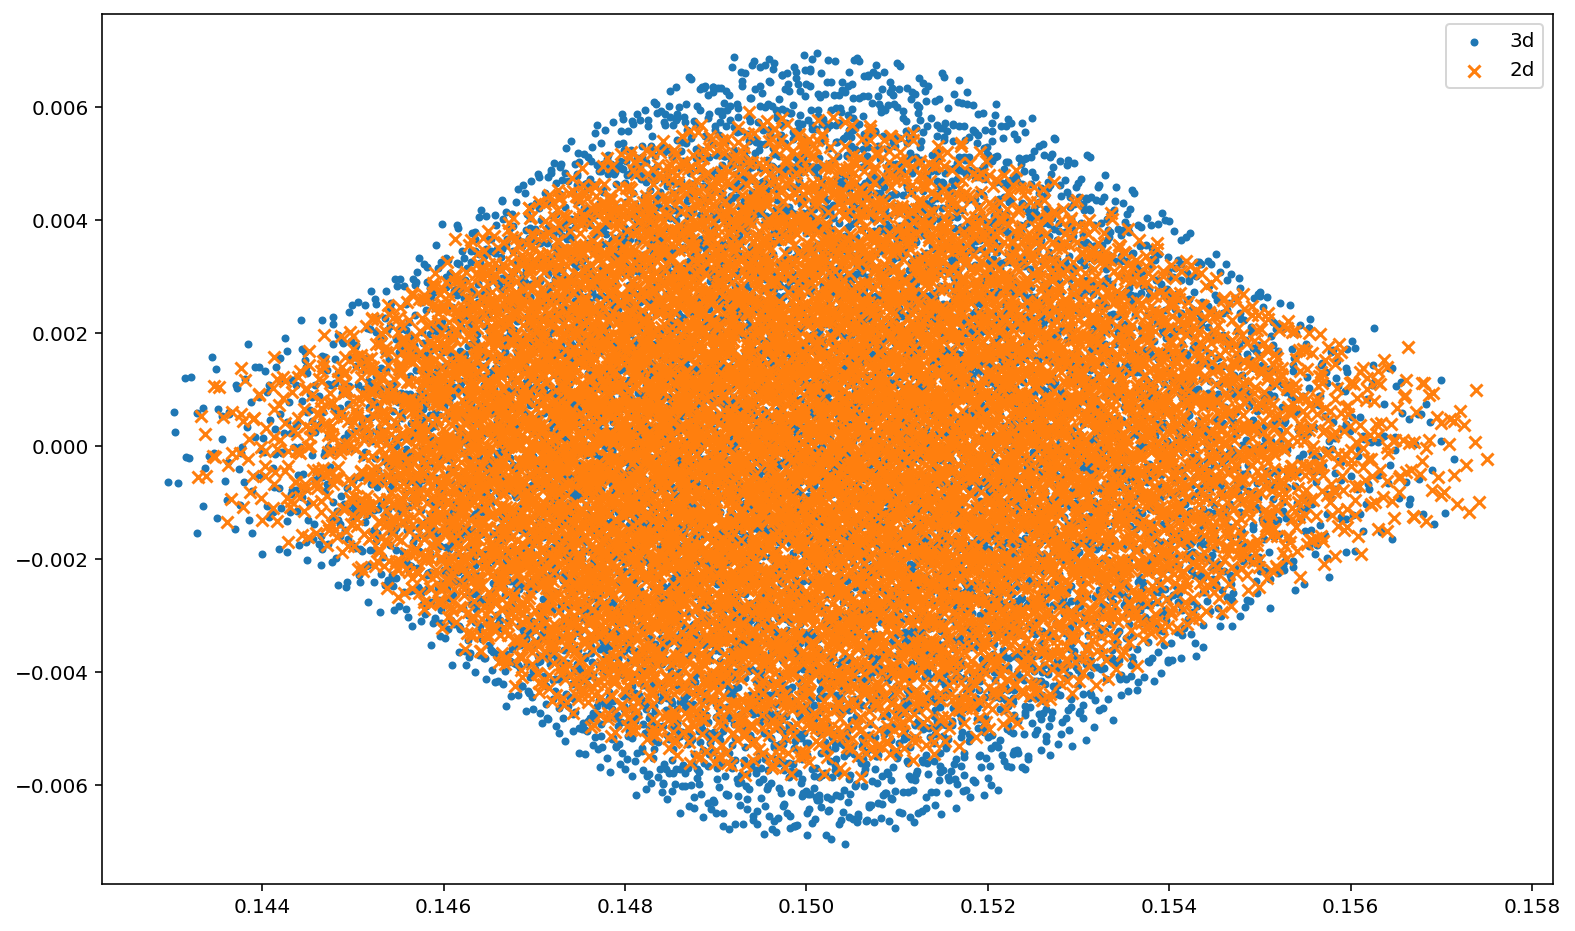

In [13]:
k1 = 'z'
k2 = 'x'
plt.scatter(P2[k1], P2[k2], label='3d', marker='.')
plt.scatter(P1[k1], P1[k2], label='2d', marker='x')

plt.legend()

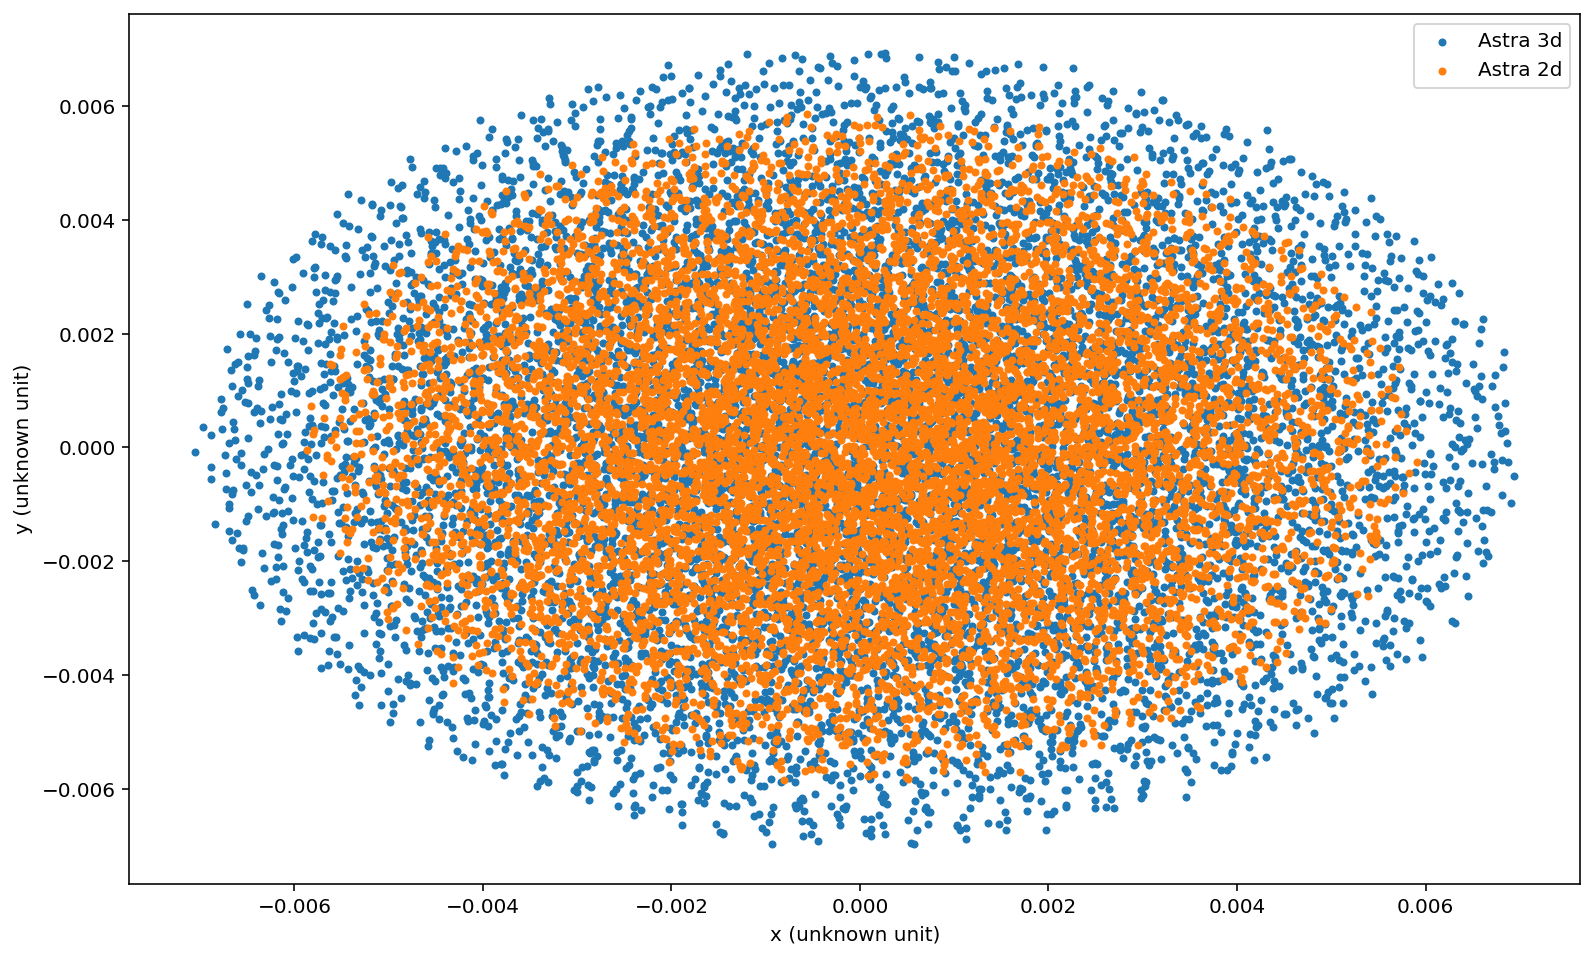

In [14]:
k1 = 'x'
k2 = 'y'

units1 = str(A.units(k1))
units2 = str(A.units(k2))
plt.xlabel(k1+f' ({units1})')
plt.ylabel(k2+f' ({units2})')
plt.scatter(P2[k1], P2[k2], label='Astra 3d', marker='.')
plt.scatter(P1[k1], P1[k2], label='Astra 2d', marker='.')
#plt.scatter(P3[k1], P3[k2], label='Impact-T 3d', marker='.')
#plt.scatter(P4[k1], P4[k2], label='GPT 3D', marker='.')
plt.legend()

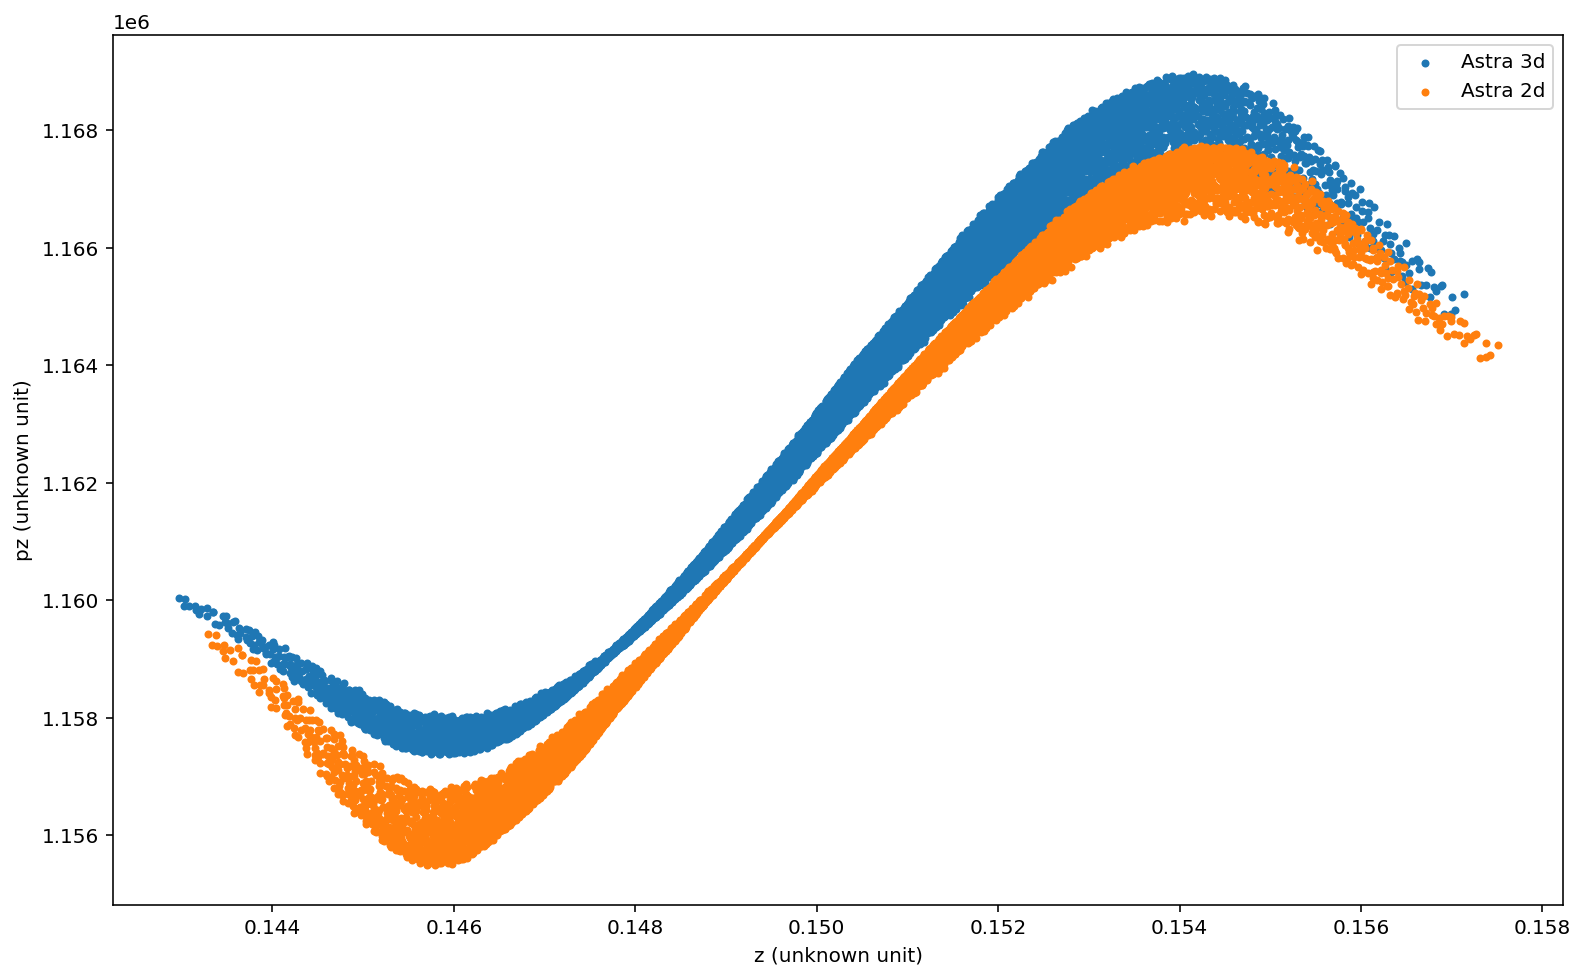

In [15]:
k1 = 'z'
k2 = 'pz'

units1 = str(A.units(k1))
units2 = str(A.units(k2))
plt.xlabel(k1+f' ({units1})')
plt.ylabel(k2+f' ({units2})')
plt.scatter(P2[k1], P2[k2], label='Astra 3d', marker='.')
plt.scatter(P1[k1], P1[k2], label='Astra 2d', marker='.')
#plt.scatter(P3[k1], P3[k2], label='Impact-T 3d', marker='.')
#plt.scatter(P4[k1], P4[k2], label='GPT 3D', marker='.')
plt.legend()

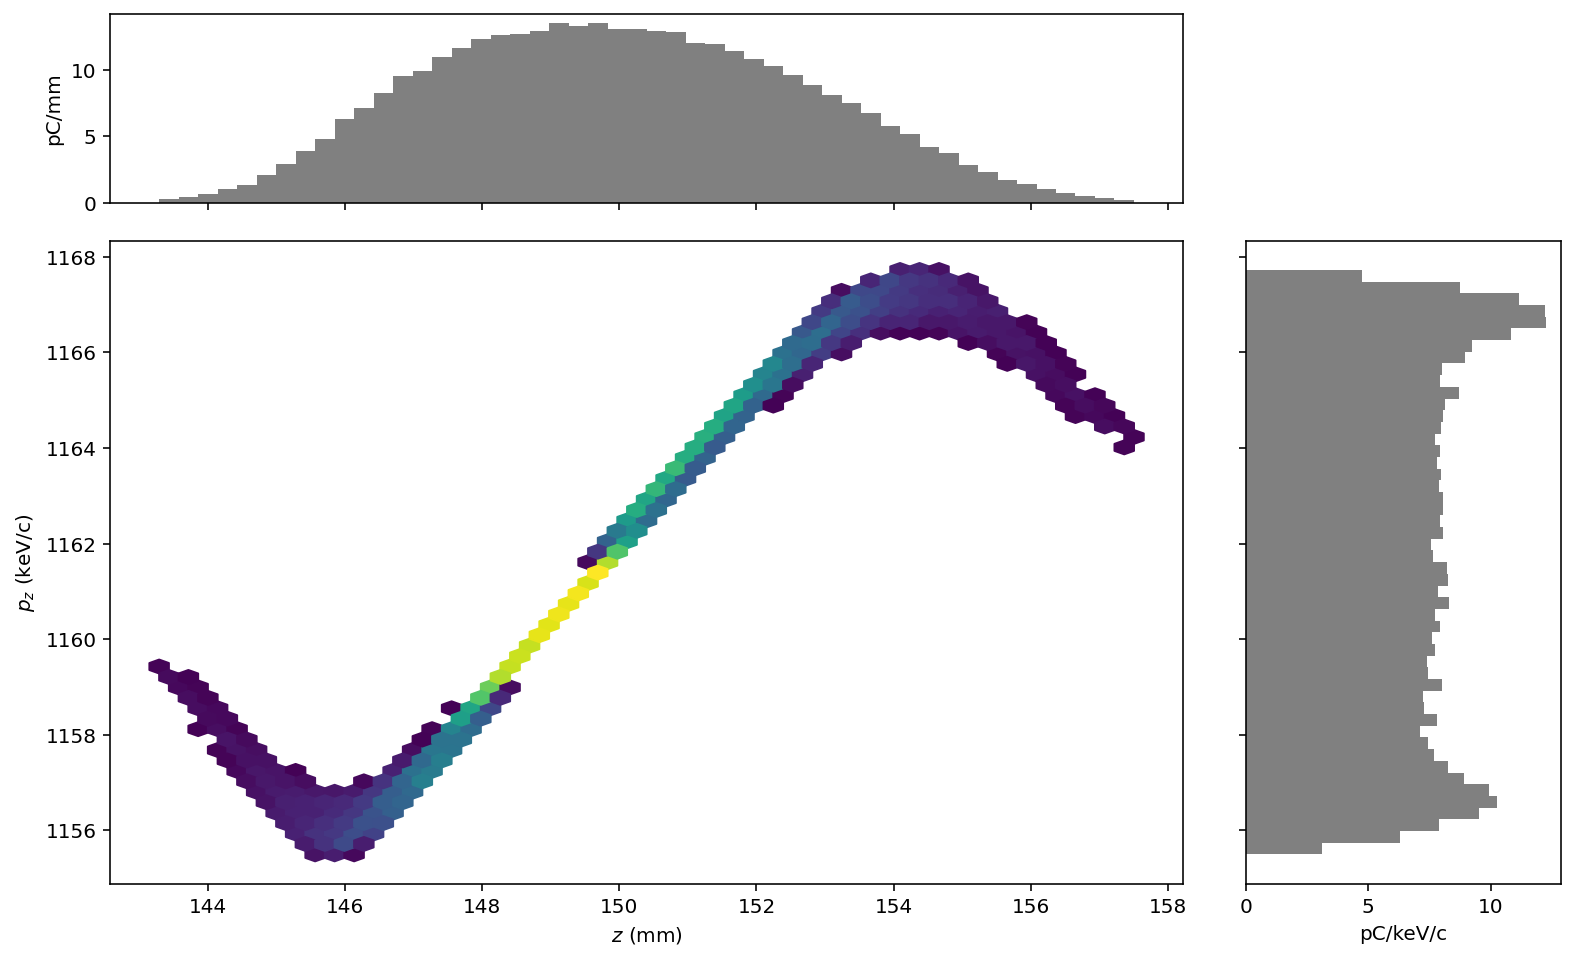

In [16]:
P1.plot('z', 'pz')

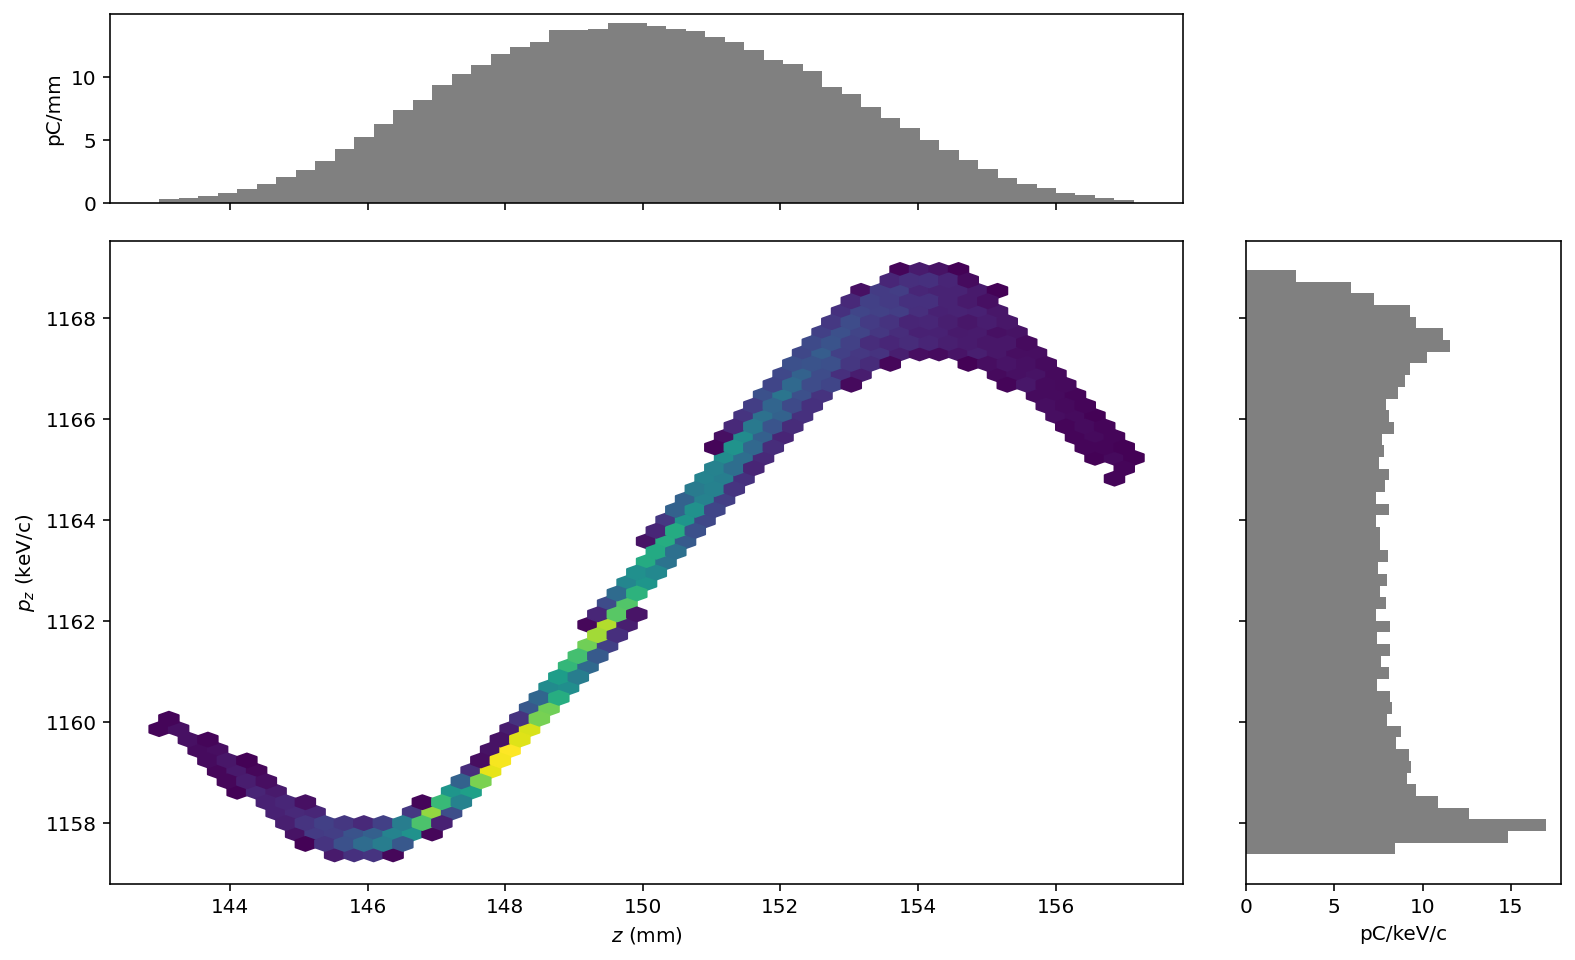

In [17]:
P2.plot('z', 'pz')

In [18]:
A.input['output']

{'zstart': 0,
 'zstop': 0.15,
 'zemit': 1000,
 'zphase': 1,
 'screen(1)': 1.490314,
 'lmagnetized': True,
 'lsub_rot': False,
 'lproject_emit': False,
 'larmors': False,
 'emits': True,
 'c_emits': True,
 'landfs': True,
 'phases': True,
 'tracks': True,
 'refs': True,
 'tchecks': False,
 'cathodes': True,
 'high_res': True}